In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
!pip install sweetviz

In [ ]:
!pip install numpy==1.24.3
import sweetviz
my_report = sweetviz.analyze(df,target_feat="Survived")
my_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


1. survive have a strong relation with sex and fare
2. p class is also strong relation with fare and age
2. 62% died and 38% survival rate
2. survived corelation with sex and fare
2. p class corelation with fare and age
2. from 1 P class survival rate 63% and 47% on class 2.
2. female survival rate is 74%
2. c embarked have 55% survival rate and q 39%.
2. age, cabin and embarked have missing values  


In [ ]:
df.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df.duplicated().mean()*100

0.0

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1,S


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: >

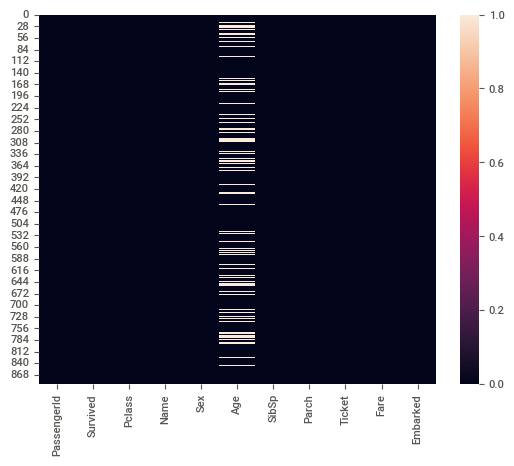

In [ ]:
sns.heatmap(df.isnull())

<Axes: >

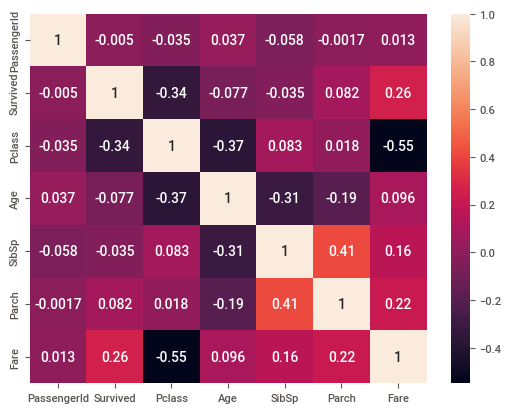

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(),annot=True)

**detect outlier**

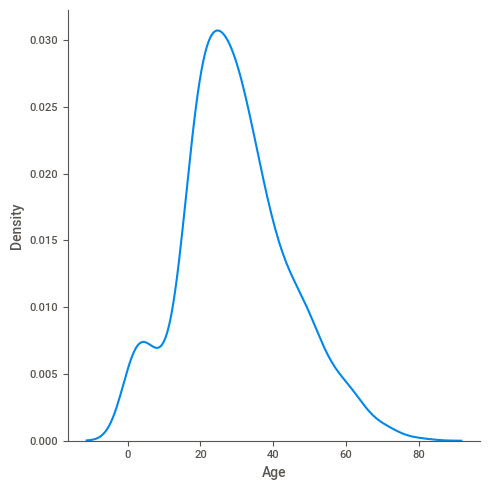

In [ ]:
sns.displot(df['Age'], kind='kde')
plt.show()

<Axes: xlabel='Age'>

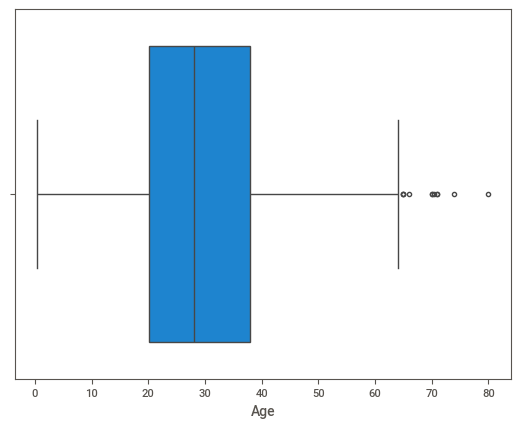

In [ ]:
sns.boxplot(x='Age', data=df)

In [ ]:
percentile25=df.Age.quantile(0.25)
percentile75=df.Age.quantile(0.75)
print(percentile25,percentile75)

20.125 38.0


In [ ]:
QRT=percentile75-percentile25
print(QRT)

17.875


In [ ]:
 upper_limit=percentile75+1.5*QRT
 lower_limit=percentile25-1.5*QRT
 print(upper_limit,lower_limit)

64.8125 -6.6875


In [ ]:
df['Age']=np.where(df['Age']>upper_limit,upper_limit,np.where(df['Age']<lower_limit,lower_limit,df['Age']))

<Axes: xlabel='Age'>

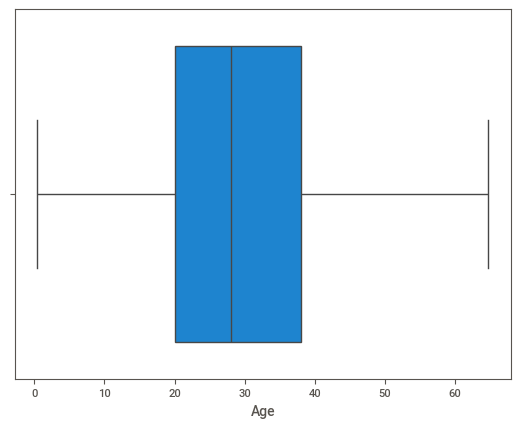

In [ ]:
sns.boxplot(x='Age', data=df)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df.drop(columns=['PassengerId','Ticket'],inplace=True)

In [ ]:
df['Family']=df['SibSp']+df['Parch']+1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [ ]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
df.sample()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
658,0,2,"Eitemiller, Mr. George Floyd",male,23.0,13.0,S,1


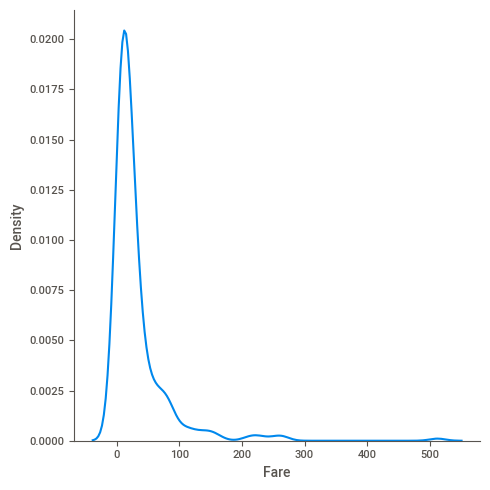

In [ ]:
sns.displot(df['Fare'], kind='kde')
plt.show()

<Axes: xlabel='Fare'>

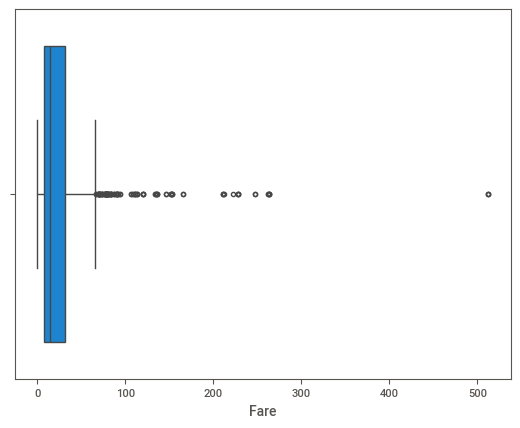

In [ ]:
sns.boxplot(x='Fare', data=df)

In [ ]:
percentil25=df.Fare.quantile(0.25)
percentil75=df.Fare.quantile(0.75)
print(percentil25,percentil75)

7.9104 31.0


In [ ]:
QRT2=percentil75-percentil25
print(QRT2)

23.0896


In [ ]:
 upper_limitt=percentil75+1.5*QRT2
 lower_limitt=percentil25-1.5*QRT2
 print(upper_limitt,lower_limitt)

65.6344 -26.724


In [ ]:
df['Fare']=np.where(df['Fare']>upper_limitt,upper_limitt,np.where(df['Fare']<lower_limitt,lower_limitt,df['Fare']))

<Axes: xlabel='Fare'>

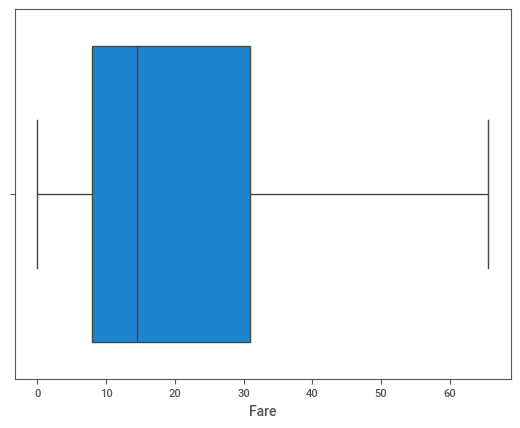

In [ ]:
sns.boxplot(x='Fare', data=df)

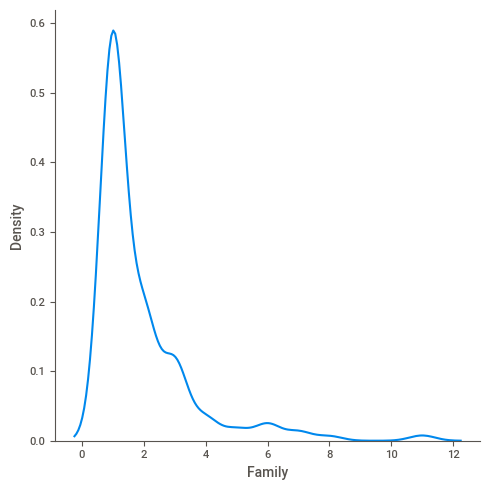

In [ ]:
sns.displot(df['Family'], kind='kde')
plt.show()

<Axes: xlabel='Family'>

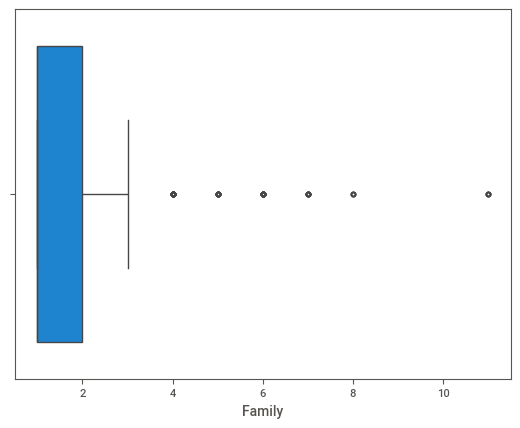

In [ ]:
sns.boxplot(x='Family', data=df)

In [ ]:
percenti25=df.Family.quantile(0.25)
percenti75=df.Family.quantile(0.75)
print(percenti25,percenti75)

1.0 2.0


In [ ]:
QRT3=percenti75-percenti25
print(QRT3)

1.0


In [ ]:
 upper_limittt=percenti75+1.5*QRT3
 lower_limittt=percenti25-1.5*QRT3
 print(upper_limittt,lower_limittt)

3.5 -0.5


In [ ]:
df['Family']=np.where(df['Family']>upper_limittt,upper_limittt,np.where(df['Family']<lower_limittt,lower_limittt,df['Family']))

<Axes: xlabel='Family'>

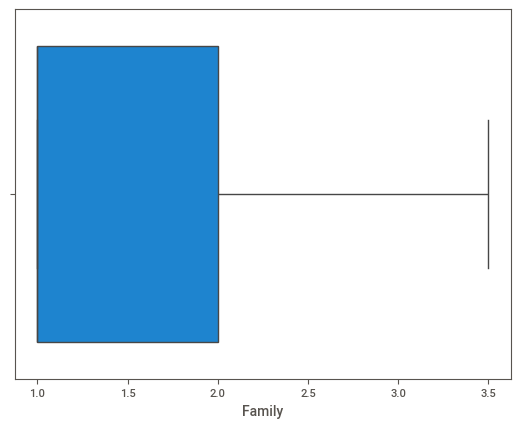

In [ ]:
sns.boxplot(x='Family', data=df)

In [ ]:
my_report2 = sweetviz.analyze(df,target_feat="Survived")
my_report2.show_html('sweetviz2_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz2_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
x = df.drop(columns=['Survived', 'Name'])

In [ ]:
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
numeric_cols=df.select_dtypes(exclude='object')

In [ ]:
categorical_cols=df.select_dtypes(include='object')

In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Family    891 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 55.8+ KB


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.compose import ColumnTransformer


In [ ]:
pipeline_age=Pipeline(steps=[
    ('imputer',KNNImputer(n_neighbors=2,weights='distance')),
    ('LOG', FunctionTransformer(np.log1p, validate=True)),
    ('scaler',StandardScaler())])


In [ ]:
num=['Fare','Family','Pclass']

In [ ]:
skewed_features = ['Fare', 'Family']
cat_features = ['Sex', 'Embarked']

In [ ]:
pipeline_skewed=Pipeline(steps=[
    ('LOG', FunctionTransformer(np.log1p, validate=True)),
    ('scaler',StandardScaler())])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
pipeline_cat=Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))])


In [ ]:
pipeline_numeric=Pipeline(steps=[
    ('LOG', FunctionTransformer(np.log1p, validate=True)),
    ('scaler',StandardScaler())])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('age_pipeline', pipeline_age, ['Age']),
    ('skew_pipeline', pipeline_skewed,skewed_features),
    ('cat_pipeline',pipeline_cat,cat_features),
    ('num_pipelines', pipeline_numeric,num)
])


In [ ]:
full_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression())
])


In [ ]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('age_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=2,
                                                                              weights='distance')),
                                                                  ('LOG',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('skew_pipeline',
                                                  Pipeline(steps=[('LOG',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fare', 'Family']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked']),
                                                 ('num_pipelines',
                                                  Pipeline(steps=[('LOG',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fare', 'Family',
                                                   'Pclass'])])),
                ('model', LogisticRegression())])

In [ ]:
y_pred=full_pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=full_pipeline.score(x_test,y_test)
accuracy

0.8044692737430168

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(full_pipeline, x, y, cv=50)

print("All scores:", scores)
print("Average accuracy:", scores.mean())


All scores: [0.88888889 0.55555556 0.83333333 0.83333333 0.72222222 0.88888889
 0.55555556 0.94444444 0.72222222 0.88888889 0.88888889 0.77777778
 0.88888889 0.77777778 0.66666667 0.83333333 1.         0.72222222
 0.94444444 0.83333333 0.77777778 0.83333333 0.66666667 0.77777778
 0.83333333 0.77777778 0.83333333 0.83333333 0.61111111 0.88888889
 0.61111111 0.72222222 0.77777778 0.88888889 0.83333333 0.72222222
 0.72222222 0.77777778 0.83333333 0.77777778 0.88888889 0.76470588
 0.82352941 0.88235294 0.88235294 0.70588235 0.88235294 0.88235294
 0.88235294 0.88235294]
Average accuracy: 0.802875816993464


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [ ]:
precision_score(y_test, y_pred)

0.7671232876712328

In [ ]:
recall_score(y_test, y_pred)

0.7567567567567568

In [ ]:
f1_score(y_test, y_pred)

0.7619047619047619

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[88, 17],
       [18, 56]])

<Axes: >

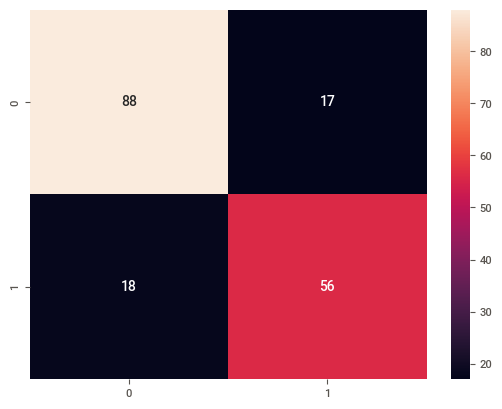

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')